In [1]:
import sys
import os
import sys
import os
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets

from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import functions
sys.path.append(os.path.abspath('../src/data'))
from extract_for_model import extract_time_series

import matplotlib.pyplot as plt


sys.path.append(os.path.abspath('../src/models'))
from test_harness import fit_model
from test_harness import get_models

#importing our function for splitting the data and an additional cross validation function,
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import cross_val_score
import math

import statsmodels.api as sm

#Allows us access to Scikit-learn linear regression model,
import sklearn.metrics
from sklearn.linear_model import LinearRegression


In [2]:
##here starts the regression for each company

wide_formatset=pd.read_csv('/home/reference/data_interim/software_private_annual_income_statements_INTERIM.csv')

min_year=2012
wide_formatset=wide_formatset[wide_formatset.year>min_year]
wide_formatset=wide_formatset[wide_formatset.year<2019]
print(len(wide_formatset.company.unique()))
print(wide_formatset.company.unique())

#dataset for the regression

set_reg=wide_formatset.loc[:, ('company','year','IQ_EBIT')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))

277
['IQ10127723' 'IQ102267046' 'IQ10348973' 'IQ104606736' 'IQ105654219'
 'IQ105664079' 'IQ105708162' 'IQ1058799' 'IQ106487857' 'IQ106623823'
 'IQ106833868' 'IQ108539514' 'IQ108950379' 'IQ109321903' 'IQ109607544'
 'IQ112263718' 'IQ112777977' 'IQ113333300' 'IQ114671457' 'IQ11519876'
 'IQ116121235' 'IQ116244473' 'IQ116787880' 'IQ116852326' 'IQ11731971'
 'IQ117439856' 'IQ117807712' 'IQ119094416' 'IQ121654' 'IQ12466090'
 'IQ128568' 'IQ132868' 'IQ132951848' 'IQ133763407' 'IQ13471413' 'IQ135685'
 'IQ13609881' 'IQ136981078' 'IQ137304419' 'IQ137936' 'IQ138652' 'IQ139512'
 'IQ139518' 'IQ140422852' 'IQ141385876' 'IQ145536370' 'IQ154798'
 'IQ1578198' 'IQ169147549' 'IQ169463770' 'IQ171082406' 'IQ171128573'
 'IQ171715722' 'IQ1858897' 'IQ199483' 'IQ20356331' 'IQ206292413'
 'IQ20645207' 'IQ206583561' 'IQ2081659' 'IQ20849634' 'IQ20932871'
 'IQ20934591' 'IQ2105390' 'IQ215288968' 'IQ215997380' 'IQ216553'
 'IQ216953628' 'IQ217003988' 'IQ217254987' 'IQ217403916' 'IQ217482351'
 'IQ217677149' 'IQ22103794' '

In [3]:
len(set_reg)

1471

In [4]:
set_reg.year.unique()

array([2015., 2016., 2017., 2018., 2013., 2014.])

In [5]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_EBIT')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_EBIT[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_EBIT[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))



company with not enough datapoints IQ116787880
company with not enough datapoints IQ234149600
company with not enough datapoints IQ331114888
no information for 2018 IQ39393440
company with not enough datapoints IQ433136404
company with not enough datapoints IQ589308959


In [6]:
list_
frame=pd.DataFrame(list_, columns=('company','prediction_EBIT','real_value_EBIT','slope_EBIT','intercept','year', 'n_years_model'))
frame['residuals_EBIT']=frame['prediction_EBIT']-frame['real_value_EBIT']

In [7]:
frame

,company,prediction_EBIT,real_value_EBIT,slope_EBIT,intercept,year,n_years_model,residuals_EBIT
0,IQ10127723,[1.644333333333293],[1.199],[0.3909999999999998],-787.393667,2018.0,4,[0.44533333333329295]
1,IQ102267046,[0.4135287999999946],[0.055783000000000006],[0.06618980000000003],-133.157488,2018.0,5,[0.35774579999999456]
2,IQ10348973,[3.8710000000000946],[0.98],[0.5618000000000002],-1129.841400,2018.0,6,[2.8910000000000946]
3,IQ104606736,[-72.8605000000025],[-103.28299999999999],[-18.285300000000003],36826.874900,2018.0,6,[30.422499999997484]
4,IQ105654219,[-0.11923290000000009],[-0.337406],[-0.01490049999999999],29.949976,2018.0,6,[0.2181730999999999]
5,IQ105664079,[18.10933333333378],[9.786],[4.856499999999999],-9782.307667,2018.0,4,[8.32333333333378]
6,IQ105708162,[-0.4820916000000004],[-0.8098310000000001],[-0.012695200000000002],25.136822,2018.0,6,[0.3277393999999997]
7,IQ1058799,[11.152238599999691],[11.620168],[2.4597876000000003],-4952.699138,2018.0,6,[-0.46792940000030825]
8,IQ106487857,[26.99290000000019],[31.995],[1.179700000000001],-2353.641700,2018.0,6,[-5.00209999999981]
9,IQ106623823,[14.157101200000398],[5.59251],[1.9370520000000004],-3894.813835,2018.0,6,[8.564591200000397]


In [8]:
#start regression for other features

#IQ_TOTAL_OTHER_OPER, IQ_EBIT, IQ_OPER_INC IQ_TOTAL_REV

set_reg=wide_formatset.loc[:, ('company','year','IQ_TOTAL_OTHER_OPER')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))

277


(array([1.417e+03, 3.700e+01, 1.000e+00, 5.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-182.30989 ,  226.225399,  634.760688, 1043.295977, 1451.831266,
        1860.366555, 2268.901844, 2677.437133, 3085.972422, 3494.507711,
        3903.043   ]),
 <a list of 10 Patch objects>)

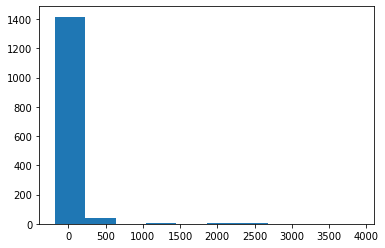

In [9]:
plt.hist(set_reg.IQ_TOTAL_OTHER_OPER)

In [10]:
min(set_reg.IQ_TOTAL_OTHER_OPER) , max(set_reg.IQ_TOTAL_OTHER_OPER)

(-182.30989, 3903.0429999999997)

In [11]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_TOTAL_OTHER_OPER')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_TOTAL_OTHER_OPER[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_TOTAL_OTHER_OPER[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))



company with not enough datapoints IQ116787880
company with not enough datapoints IQ234149600
company with not enough datapoints IQ331114888
no information for 2018 IQ35143670
company with not enough datapoints IQ433136404
company with not enough datapoints IQ589308959


In [12]:
list_
frame_op=pd.DataFrame(list_, columns=('company','prediction_TOTAL_OPER','real_value_TOTAL_OPER','slope_TOTAL_OPER','intercept','year', 'n_years_model'))
frame_op['residuals_TOTAL_OPER']=frame_op['prediction_TOTAL_OPER']-frame_op['real_value_TOTAL_OPER']

In [13]:
set_reg_2017=set_reg[set_reg.year==2017]
frame_op=pd.merge(frame_op,set_reg_2017, on='company' )

In [14]:
len(frame_op.company)

263

In [15]:
#IQ_TOTAL_OTHER_OPER is the year 2017 value

frame_total=pd.merge(frame, frame_op.loc[:,['company', 'prediction_TOTAL_OPER', 'real_value_TOTAL_OPER',
       'slope_TOTAL_OPER', 'intercept', 'n_years_model',
       'residuals_TOTAL_OPER', 'IQ_TOTAL_OTHER_OPER']], on='company')

In [16]:
frame_total.head()

,company,prediction_EBIT,real_value_EBIT,slope_EBIT,intercept_x,year,n_years_model_x,residuals_EBIT,prediction_TOTAL_OPER,real_value_TOTAL_OPER,slope_TOTAL_OPER,intercept_y,n_years_model_y,residuals_TOTAL_OPER,IQ_TOTAL_OTHER_OPER
0,IQ10127723,[1.644333333333293],[1.199],[0.3909999999999998],-787.393667,2018.0,4,[0.44533333333329295],[4.508000000000038],[5.775],[0.5445],-1094.293000,4,[-1.2669999999999622],3.956000
1,IQ10348973,[3.8710000000000946],[0.98],[0.5618000000000002],-1129.841400,2018.0,6,[2.8910000000000946],[11.483699999999999],[14.005],[0.5951],-1189.428100,6,[-2.521300000000002],11.919000
2,IQ104606736,[-72.8605000000025],[-103.28299999999999],[-18.285300000000003],36826.874900,2018.0,6,[30.422499999997484],[381.19550000000163],[363.913],[64.36350000000003],-129504.347500,6,[17.28250000000162],312.009000
3,IQ105654219,[-0.11923290000000009],[-0.337406],[-0.01490049999999999],29.949976,2018.0,6,[0.2181730999999999],[5.633651599999894],[5.580877],[0.6645222000000001],-1335.372148,6,[0.052774599999893645],5.506852
4,IQ105664079,[18.10933333333378],[9.786],[4.856499999999999],-9782.307667,2018.0,4,[8.32333333333378],[35.35366666666687],[46.951],[3.5954999999999986],-7220.365333,4,[-11.597333333333133],33.476000


In [17]:
frame_op.columns.values

array(['company', 'prediction_TOTAL_OPER', 'real_value_TOTAL_OPER',
       'slope_TOTAL_OPER', 'intercept', 'year_x', 'n_years_model',
       'residuals_TOTAL_OPER', 'year_y', 'IQ_TOTAL_OTHER_OPER'],
      dtype=object)

In [18]:

#IQ_TOTAL_OTHER_OPER, IQ_EBIT, IQ_OPER_INC IQ_TOTAL_REV

set_reg=wide_formatset.loc[:, ('company','year','IQ_OPER_INC')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))

277


(array([1.000e+00, 1.000e+00, 0.000e+00, 1.447e+03, 1.900e+01, 1.000e+00,
        0.000e+00, 2.000e+00, 3.000e+00, 2.000e+00]),
 array([-669.315 , -485.2043, -301.0936, -116.9829,   67.1278,  251.2385,
         435.3492,  619.4599,  803.5706,  987.6813, 1171.792 ]),
 <a list of 10 Patch objects>)

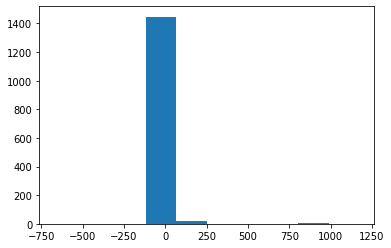

In [19]:
plt.hist(set_reg.IQ_OPER_INC)

In [20]:
min(set_reg.IQ_OPER_INC) , max(set_reg.IQ_OPER_INC)

(-669.315, 1171.792)

In [21]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_OPER_INC')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_OPER_INC[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_OPER_INC[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))



company with not enough datapoints IQ116787880
company with not enough datapoints IQ234149600
company with not enough datapoints IQ331114888
company with not enough datapoints IQ433136404
company with not enough datapoints IQ589308959


In [22]:
list_
frame_op_inc=pd.DataFrame(list_, columns=('company','prediction_OPER_INC','real_value_OPER_INC','slope_OPER_INC','intercept','year', 'n_years_model'))
frame_op_inc['residuals_OPER_INC']=frame_op_inc['prediction_OPER_INC']-frame_op_inc['real_value_OPER_INC']

In [23]:
set_reg_2017=set_reg[set_reg.year==2017]
frame_op_inc=pd.merge(frame_op_inc,set_reg_2017, on='company' )

In [24]:

frame_total=pd.merge(frame_total, frame_op_inc.loc[:,['company', 'prediction_OPER_INC', 'real_value_OPER_INC',
       'slope_OPER_INC', 'intercept', 'n_years_model',
       'residuals_OPER_INC', 'IQ_OPER_INC']], on='company')

In [25]:
frame_total

,company,prediction_EBIT,real_value_EBIT,slope_EBIT,intercept_x,year,n_years_model_x,residuals_EBIT,prediction_TOTAL_OPER,real_value_TOTAL_OPER,...,n_years_model_y,residuals_TOTAL_OPER,IQ_TOTAL_OTHER_OPER,prediction_OPER_INC,real_value_OPER_INC,slope_OPER_INC,intercept,n_years_model,residuals_OPER_INC,IQ_OPER_INC
0,IQ10127723,[1.644333333333293],[1.199],[0.3909999999999998],-787.393667,2018.0,4,[0.44533333333329295],[4.508000000000038],[5.775],...,4,[-1.2669999999999622],3.956000,[1.644333333333293],[1.199],[0.3909999999999998],-787.393667,4,[0.44533333333329295],1.691000
1,IQ10348973,[3.8710000000000946],[0.98],[0.5618000000000002],-1129.841400,2018.0,6,[2.8910000000000946],[11.483699999999999],[14.005],...,6,[-2.521300000000002],11.919000,[3.8710000000000946],[0.98],[0.5618000000000002],-1129.841400,6,[2.8910000000000946],3.543000
2,IQ104606736,[-72.8605000000025],[-103.28299999999999],[-18.285300000000003],36826.874900,2018.0,6,[30.422499999997484],[381.19550000000163],[363.913],...,6,[17.28250000000162],312.009000,[-72.8605000000025],[-103.28299999999999],[-18.285300000000003],36826.874900,6,[30.422499999997484],-74.577000
3,IQ105654219,[-0.11923290000000009],[-0.337406],[-0.01490049999999999],29.949976,2018.0,6,[0.2181730999999999],[5.633651599999894],[5.580877],...,6,[0.052774599999893645],5.506852,[-0.11923290000000009],[-0.337406],[-0.01490049999999999],29.949976,6,[0.2181730999999999],-0.539657
4,IQ105664079,[18.10933333333378],[9.786],[4.856499999999999],-9782.307667,2018.0,4,[8.32333333333378],[35.35366666666687],[46.951],...,4,[-11.597333333333133],33.476000,[18.10933333333378],[9.786],[4.856499999999999],-9782.307667,4,[8.32333333333378],10.075000
5,IQ105708162,[-0.4820916000000004],[-0.8098310000000001],[-0.012695200000000002],25.136822,2018.0,6,[0.3277393999999997],[12.431576100000257],[13.105929],...,6,[-0.674352899999743],11.581359,[-0.4820916000000004],[-0.8098310000000001],[-0.012695200000000002],25.136822,6,[0.3277393999999997],-0.390303
6,IQ1058799,[11.152238599999691],[11.620168],[2.4597876000000003],-4952.699138,2018.0,6,[-0.46792940000030825],[19.465223100000003],[18.336739],...,6,[1.1284841000000014],19.599737,[11.152238599999691],[11.620168],[2.4597876000000003],-4952.699138,6,[-0.46792940000030825],7.872432
7,IQ106487857,[26.99290000000019],[31.995],[1.179700000000001],-2353.641700,2018.0,6,[-5.00209999999981],[95.97919999999795],[228.174],...,6,[-132.19480000000206],83.565000,[26.99290000000019],[31.995],[1.179700000000001],-2353.641700,6,[-5.00209999999981],24.469000
8,IQ106623823,[14.157101200000398],[5.59251],[1.9370520000000004],-3894.813835,2018.0,6,[8.564591200000397],[15.74799830000029],[17.110083],...,6,[-1.3620846999997092],14.559392,[14.157101200000398],[5.59251],[1.9370520000000004],-3894.813835,6,[8.564591200000397],9.656718
9,IQ106833868,[-5.683200000000397],[-2.418],[1.1158000000000001],-2257.367600,2018.0,6,[-3.265200000000397],[19.02009999999973],[21.026],...,6,[-2.0059000000002705],28.672000,[-5.683200000000397],[-2.418],[1.1158000000000001],-2257.367600,6,[-3.265200000000397],-9.684000


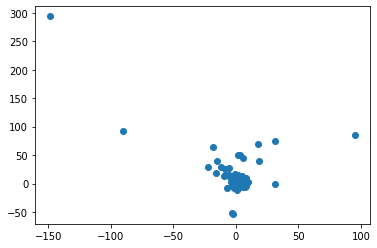

In [26]:
plt.scatter(x=frame_total['slope_EBIT'], y=frame_total['slope_TOTAL_OPER'])
plt.show()

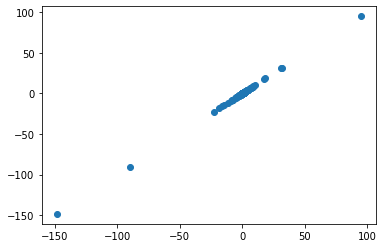

In [27]:
plt.scatter(x=frame_total['slope_EBIT'], y=frame_total['slope_OPER_INC'])
plt.show()

277


(array([1.452e+03, 8.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 6.000e+00, 3.000e+00]),
 array([8.60000000e-04, 7.87722874e+02, 1.57544489e+03, 2.36316690e+03,
        3.15088892e+03, 3.93861093e+03, 4.72633294e+03, 5.51405496e+03,
        6.30177697e+03, 7.08949899e+03, 7.87722100e+03]),
 <a list of 10 Patch objects>)

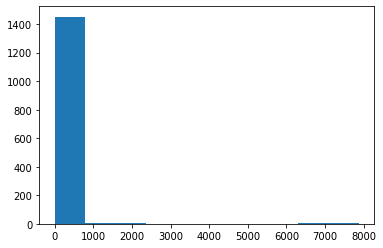

In [28]:
#need to do IQ_TOTAL_REV
set_reg=wide_formatset.loc[:, ('company','year','IQ_TOTAL_REV')]
set_reg=set_reg.dropna()

print(len(set_reg.company.unique()))
plt.hist(set_reg.IQ_TOTAL_REV)

In [29]:
min(set_reg.IQ_TOTAL_REV) , max(set_reg.IQ_TOTAL_REV)

(0.00086, 7877.221)

In [30]:
list_=[]


for i in set_reg.company.unique():
    
    set_reg2=set_reg[set_reg.company==i]
    if (len(set_reg2)>1):
        set_reg2=set_reg2.loc[:, ('year', 'IQ_TOTAL_REV')]
        max_year=np.asarray(max(set_reg2.year))
        if (max_year==2018):
            test_point=np.asarray(set_reg2.IQ_TOTAL_REV[set_reg2.year==max_year])

#set_reg3=set_reg2[set_reg2.year!=max_year]
#max_year2=max(set_reg3.year)
            training_point=np.asarray(set_reg2.year[set_reg2.year!=max_year])
            target_point=np.asarray(set_reg2.IQ_TOTAL_REV[set_reg2.year!=max_year])
            training_point#training_points
# Create linear regression object
            regr = linear_model.LinearRegression()

# Train the model using the training set
            regr.fit(np.reshape(training_point,(-1,1)), target_point)

# Make predictions using the testing set
            y_pred = regr.predict([[max_year]])
            new=i, y_pred,test_point, regr.coef_,regr.intercept_,max_year,len(set_reg2)

            list_.append(new)
        if (max_year!=2018):
            print('no information for 2018',i)
    if (len(set_reg2)==1):
        print('company with not enough datapoints', i)
# The coefficients
  #      print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
     # % mean_squared_error(test_point, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(test_point, y_pred))



company with not enough datapoints IQ116787880
company with not enough datapoints IQ234149600
company with not enough datapoints IQ331114888
company with not enough datapoints IQ433136404
company with not enough datapoints IQ589308959


In [31]:

list_
frame_total_rev=pd.DataFrame(list_, columns=('company','prediction_TOTAL_REV','real_value_TOTAL_REV','slope_TOTAL_REV','intercept','year', 'n_years_model'))
frame_total_rev['residuals_TOTAL_REV']=frame_total_rev['prediction_TOTAL_REV']-frame_total_rev['real_value_TOTAL_REV']

In [32]:
set_reg_2017=set_reg[set_reg.year==2017]
frame_total_rev=pd.merge(frame_total_rev,set_reg_2017, on='company' )

In [33]:
frame_total=pd.merge(frame_total, frame_total_rev.loc[:,['company', 'prediction_TOTAL_REV', 'real_value_TOTAL_REV',
       'slope_TOTAL_REV', 'intercept', 'n_years_model',
       'residuals_TOTAL_REV', 'IQ_TOTAL_REV']], on='company')

In [34]:
frame_total

,company,prediction_EBIT,real_value_EBIT,slope_EBIT,intercept_x,year,n_years_model_x,residuals_EBIT,prediction_TOTAL_OPER,real_value_TOTAL_OPER,...,n_years_model_x,residuals_OPER_INC,IQ_OPER_INC,prediction_TOTAL_REV,real_value_TOTAL_REV,slope_TOTAL_REV,intercept_y,n_years_model_y,residuals_TOTAL_REV,IQ_TOTAL_REV
0,IQ10127723,[1.644333333333293],[1.199],[0.3909999999999998],-787.393667,2018.0,4,[0.44533333333329295],[4.508000000000038],[5.775],...,4,[0.44533333333329295],1.691000,[6.340666666666721],[7.379],[0.936],-1882.507333,4,[-1.038333333333279],5.841000
1,IQ10348973,[3.8710000000000946],[0.98],[0.5618000000000002],-1129.841400,2018.0,6,[2.8910000000000946],[11.483699999999999],[14.005],...,6,[2.8910000000000946],3.543000,[26.972200000000157],[24.316],[2.2992000000000004],-4612.813400,6,[2.656200000000158],25.579000
2,IQ104606736,[-72.8605000000025],[-103.28299999999999],[-18.285300000000003],36826.874900,2018.0,6,[30.422499999997484],[381.19550000000163],[363.913],...,6,[30.422499999997484],-74.577000,[450.2949999999837],[392.00800000000004],[67.93660000000001],-136645.763800,6,[58.286999999983664],355.856000
3,IQ105654219,[-0.11923290000000009],[-0.337406],[-0.01490049999999999],29.949976,2018.0,6,[0.2181730999999999],[5.633651599999894],[5.580877],...,6,[0.2181730999999999],-0.539657,[8.592850799999951],[8.416115],[0.8039680000000001],-1613.814573,6,[0.17673579999995148],8.188910
4,IQ105664079,[18.10933333333378],[9.786],[4.856499999999999],-9782.307667,2018.0,4,[8.32333333333378],[35.35366666666687],[46.951],...,4,[8.32333333333378],10.075000,[53.63366666666661],[57.708999999999996],[7.807999999999999],-15702.910333,4,[-4.075333333333383],44.558000
5,IQ105708162,[-0.4820916000000004],[-0.8098310000000001],[-0.012695200000000002],25.136822,2018.0,6,[0.3277393999999997],[12.431576100000257],[13.105929],...,6,[0.3277393999999997],-0.390303,[12.264374299999872],[12.989053],[1.8264111000000003],-3673.433226,6,[-0.724678700000128],11.451703
6,IQ1058799,[11.152238599999691],[11.620168],[2.4597876000000003],-4952.699138,2018.0,6,[-0.46792940000030825],[19.465223100000003],[18.336739],...,6,[-0.46792940000030825],7.872432,[74.08652190000066],[73.93571999999999],[2.2061828999999995],-4377.990570,6,[0.15080190000067262],71.185360
7,IQ106487857,[26.99290000000019],[31.995],[1.179700000000001],-2353.641700,2018.0,6,[-5.00209999999981],[95.97919999999795],[228.174],...,6,[-5.00209999999981],24.469000,[122.97210000000268],[260.16900000000004],[-9.898300000000004],20097.741500,6,[-137.19689999999736],108.034000
8,IQ106623823,[14.157101200000398],[5.59251],[1.9370520000000004],-3894.813835,2018.0,6,[8.564591200000397],[15.74799830000029],[17.110083],...,6,[8.564591200000397],9.656718,[64.95204219999869],[51.776295000000005],[8.8101348],-17713.899984,6,[13.175747199998682],55.914886
9,IQ106833868,[-5.683200000000397],[-2.418],[1.1158000000000001],-2257.367600,2018.0,6,[-3.265200000000397],[19.02009999999973],[21.026],...,6,[-3.265200000000397],-9.684000,[12.983299999999872],[19.464000000000002],[-3.8207000000000004],7723.155900,6,[-6.48070000000013],19.390000


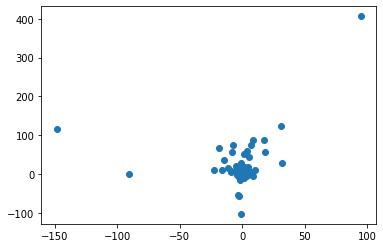

In [35]:
plt.scatter(x=frame_total['slope_EBIT'], y=frame_total['slope_TOTAL_REV'])
plt.show()

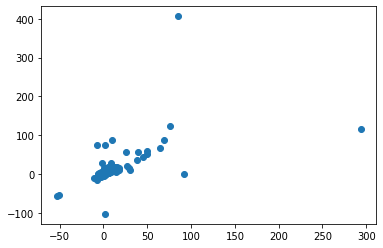

In [36]:
plt.scatter(x=frame_total['slope_TOTAL_OPER'], y=frame_total['slope_TOTAL_REV'])
plt.show()

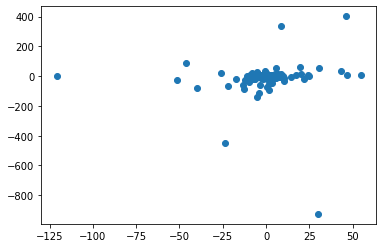

In [37]:
plt.scatter(x=frame_total['residuals_EBIT'], y=frame_total['residuals_TOTAL_REV'])
plt.show()

In [38]:
frame_total.columns.values

array(['company', 'prediction_EBIT', 'real_value_EBIT', 'slope_EBIT',
       'intercept_x', 'year', 'n_years_model_x', 'residuals_EBIT',
       'prediction_TOTAL_OPER', 'real_value_TOTAL_OPER',
       'slope_TOTAL_OPER', 'intercept_y', 'n_years_model_y',
       'residuals_TOTAL_OPER', 'IQ_TOTAL_OTHER_OPER',
       'prediction_OPER_INC', 'real_value_OPER_INC', 'slope_OPER_INC',
       'intercept_x', 'n_years_model_x', 'residuals_OPER_INC',
       'IQ_OPER_INC', 'prediction_TOTAL_REV', 'real_value_TOTAL_REV',
       'slope_TOTAL_REV', 'intercept_y', 'n_years_model_y',
       'residuals_TOTAL_REV', 'IQ_TOTAL_REV'], dtype=object)

In [39]:
frame_total.to_csv('dataframe_slopes_for_features.csv')